# Oscillating flat plate

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import ibmos as ib

## Numerical grid and solver initialization

In [3]:
s1=ib.stretching(35, 0.03125/4, 0.03125, 4, 8, 8, 0.04)
s1=np.r_[s1, 2*s1[-1]-s1[-2::-1]]
s1/=s1[-1]

s2=ib.stretching(42, 0.03125/4, 0.03125, 4, 8, 8, 0.04)
s2=np.r_[s2, 2*s2[-1]-s2[-2::-1]]
s2/=s2[-1]

solver = ib.Solver(x=s1, y=s2, periodic=True, iRe=1/100, Co=0.75, fractionalStep=False)

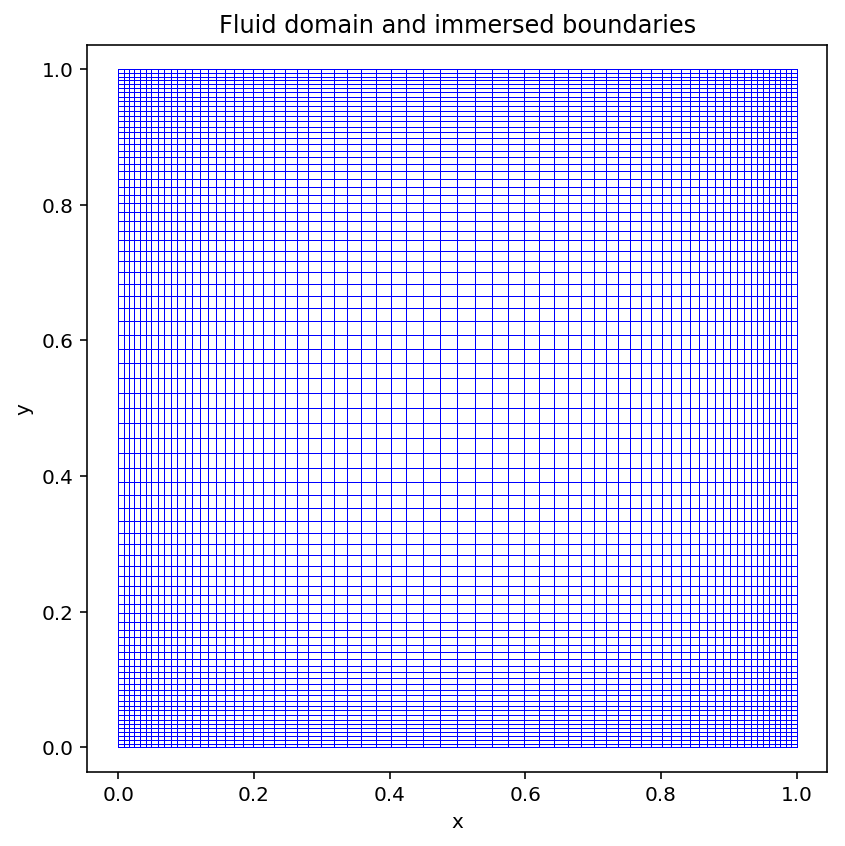

In [4]:
solver.plot_domain()

## Boundary conditions

In [5]:
fvBC = (lambda s, t: np.cos(t)*np.ones_like(s),) + (lambda s, t: np.zeros_like(s),)*3
fuBC = (lambda s, t: np.zeros_like(s),)*4

## Unsteady simulation

In [6]:
%%time
x, t, infodict = solver.steps(solver.zero(), fuBC, fvBC, saveEvery=int(1/solver.dt), number=int(10/solver.dt), verbose=int(1/solver.dt))

Initializing solver...done.
       k            t          x_2       dxdt_2 
     432  9.97843e-01  1.68673e+01  1.47249e+01 
     864  1.99569e+00  7.63831e+00  2.27782e+01 
    1296  2.99353e+00  2.13162e+01  1.28345e+01 
    1728  3.99137e+00  2.11142e+01  1.35363e+01 
    2160  4.98922e+00  8.68397e+00  2.34537e+01 
    2592  5.98706e+00  1.94819e+01  1.54857e+01 
    3024  6.98490e+00  2.20349e+01  1.13748e+01 
    3456  7.98275e+00  9.34608e+00  2.29801e+01 
    3888  8.98059e+00  1.76243e+01  1.75426e+01 
    4320  9.97843e+00  2.29992e+01  9.49813e+00 
    4329  9.99922e+00  2.29043e+01  9.72440e+00 
CPU times: user 21min 11s, sys: 33.7 s, total: 21min 45s
Wall time: 46.8 s


## Display results

Plot velocity components and pressure.

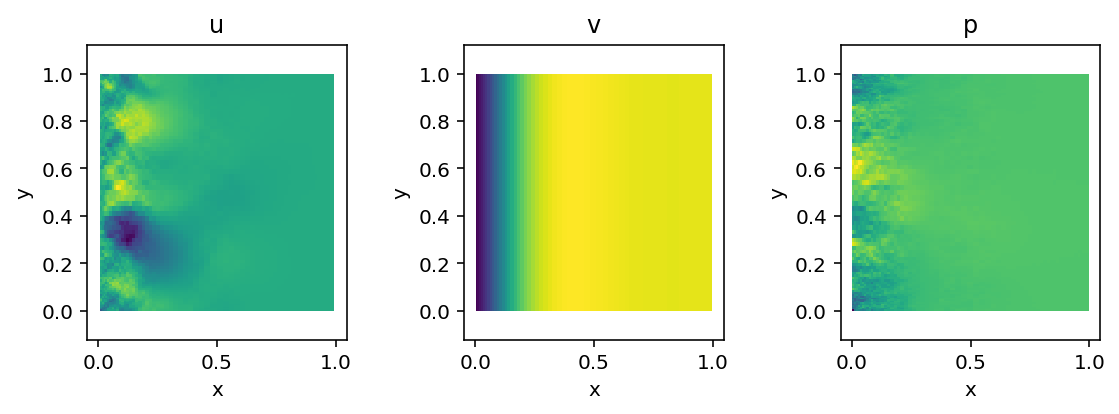

In [7]:
solver.plot_field(x[-1], xlim=(0, 1), ylim=(0, 1))

Check results against analytical solution given by
$$\frac{v(x, t)}{V} =  \mathcal{R}\left[ \frac{\sinh{ \sqrt{\mathrm{i}\omega \,Re} (1-x) } }{\sinh{ \sqrt{\mathrm{i}\omega Re } }} e^{\mathrm{i}\omega t} \right]$$

In [8]:
ve = lambda x, t: (np.sinh(np.sqrt(1j/solver.iRe)*(1-x))/np.sinh(np.sqrt(1j/solver.iRe))*np.exp(1j*t) ).real

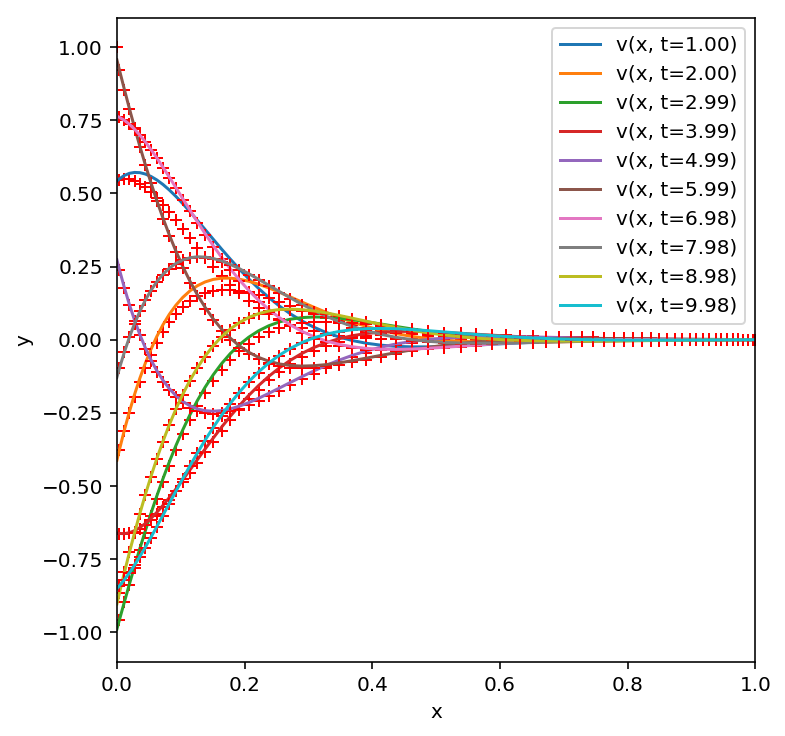

In [9]:
plt.figure(figsize=(5.5, 5.25))
vi = solver.fluid.v.shape[0]//2

vx = np.r_[solver.fluid.x[0], solver.fluid.v.x, solver.fluid.x[-1]]

for tk, xk in zip(t, x):
    u, v, p = solver.reshape(solver.unpack(xk), 0)
    vv = np.r_[fvBC[0](solver.fluid.v.y[vi], 0), v[vi,:], fvBC[1](solver.fluid.v.y[vi], 0)]
    plt.plot(vx, vv, '+r');
    plt.plot(vx, ve(vx, tk), label='v(x, t=%.2f)'%tk);


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.xlim(0, 1.0)
plt.ylim(-1.1, 1.1);

Plot temporal evolution of the residual

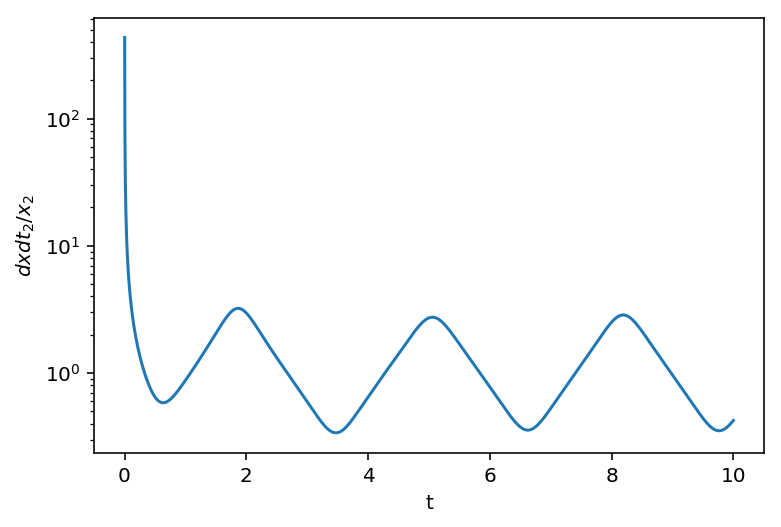

In [10]:
plt.figure()
plt.semilogy(infodict['t'], infodict['dxdt_2']/infodict['x_2'])
plt.xlabel('t')
plt.ylabel(r'$dxdt_2/x_2$');